## Initialization

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Opgave 13

In [3]:
# Given data
X = np.array([56, 101, 78, 67, 93, 87, 64, 72, 80, 69])
a, b = -5, 5
n = len(X)
B = 10000  # Number of bootstrap samples

# Calculate sample mean
X_mean = np.mean(X)

# Generate bootstrap samples and calculate the proportion in the interval (a, b)
count = 0
for _ in range(B):
    X_star = np.random.choice(X, size=n, replace=True)

    X_star_mean = np.sum(X_star/n)
    
    if a < (X_star_mean - X_mean) < b:
        count += 1

# Estimate of p
p_estimate = count / B
p_estimate

0.7583

## Opgave 15

In [4]:
# Given data

X = np.array([5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8])
n = len(X)
B = 10000  # Number of bootstrap samples

# Function to calculate sample variance
def sample_variance(data):
    return np.var(data, ddof=1)

# Calculate the original sample variance
S2 = sample_variance(X)

# Generate bootstrap samples and calculate the sample variance for each
bootstrap_variances = np.zeros(B)
for i in range(B):
    X_star = np.random.choice(X, size=n, replace=True)
    bootstrap_variances[i] = sample_variance(X_star)

# Estimate the variance of the sample variances
bootstrap_variance_of_variance = np.var(bootstrap_variances, ddof=1)
bootstrap_variance_of_variance

58.50802925085162

## 

Sample Mean: 3.896255941727426
Sample Median: 1.014866229318845
boot Mean: 3.889668987638492
boot Median: 1.0226570162719681
Bootstrap Variance of Sample Mean: 0.9486957167637418
Bootstrap Variance of Sample Median: 0.016281704346977115
Precision of Sample Mean: 1.0266833762167547
Precision of Sample Median: 7.837003989535993
The median has higher precision than the mean.


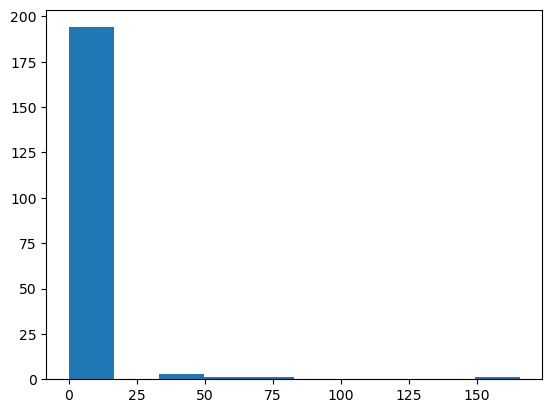

In [5]:
import numpy as np
np.random.seed(123)
def bootstrap_variance(data, num_bootstrap=1000):
    n = len(data)
    bootstrap_medians = np.zeros(num_bootstrap)
    
    for i in range(num_bootstrap):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_medians[i] = np.median(bootstrap_sample)
    
    return np.median(data), np.var(bootstrap_medians)

# Parameters for the Pareto distribution
beta = 1
k = 1.05
N = 200

# Generate Pareto-distributed random variables
data = np.random.pareto(a=k, size=N) * beta
plt.hist(data)
# Calculate sample mean and median
sample_mean = np.mean(data)
sample_median = np.median(data)

# Bootstrap estimate of the variance of the sample mean
def bootstrap_variance_mean_median(data, num_bootstrap=1000):
    n = len(data)
    bootstrap_means = np.zeros(num_bootstrap)
    bootstrap_medians = np.zeros(num_bootstrap)
    
    for i in range(num_bootstrap):
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
        bootstrap_medians[i] = np.median(bootstrap_sample)
    
    return np.mean(bootstrap_means),np.mean(bootstrap_medians), np.var(bootstrap_means), np.var(bootstrap_medians)

# Compute results
median, variance_median = bootstrap_variance(data)
boot_mean, boot_median, variance_mean, variance_median = bootstrap_variance_mean_median(data)

# Print results
print(f"Sample Mean: {sample_mean}")
print(f"Sample Median: {sample_median}")
print(f"boot Mean: {boot_mean}")
print(f"boot Median: {boot_median}")
print(f"Bootstrap Variance of Sample Mean: {variance_mean}")
print(f"Bootstrap Variance of Sample Median: {variance_median}")

# Comparison of precision
precision_mean = 1 / np.sqrt(variance_mean)
precision_median = 1 / np.sqrt(variance_median)

print(f"Precision of Sample Mean: {precision_mean}")
print(f"Precision of Sample Median: {precision_median}")

if precision_median > precision_mean:
    print("The median has higher precision than the mean.")
else:
    print("The mean has higher precision than the median.")